In [1]:
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import glob
import os
import string
import numpy
import re
import pandas as pd
import multiprocessing
import gensim
import random
from tqdm import tqdm
from gensim.models import KeyedVectors
from adjustText import adjust_text


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
model = KeyedVectors.load_word2vec_format('model-whole.bin', binary = True)

In [3]:
df = pd.read_csv('bigrams_vreemde.csv')
list_words = list(df.ngram)        
list_words = [w for w in list_words if w in list(model.wv.vocab)]
list_words

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


['0000',
 '04',
 '050',
 '075',
 '0ind',
 '10',
 '100',
 '1000',
 '10000',
 '102',
 '1025',
 '1031',
 '105',
 '1050',
 '10500',
 '1075',
 '1077',
 '1085',
 '109',
 '10—',
 '110',
 '1100',
 '11000',
 '11100',
 '1127',
 '1145',
 '1150',
 '11500',
 '12',
 '120',
 '1200',
 '12000',
 '1225',
 '123',
 '125',
 '1250',
 '12500',
 '1254',
 '1260',
 '1275',
 '13',
 '130',
 '1300',
 '13000',
 '1313',
 '1325',
 '1338',
 '1350',
 '13500',
 '1360',
 '1375',
 '139',
 '13—',
 '14',
 '140',
 '1400',
 '14000',
 '141',
 '1410',
 '142',
 '1425',
 '145',
 '1450',
 '14500',
 '1460',
 '1475',
 '1480',
 '14—',
 '15',
 '150',
 '1500',
 '15000',
 '1525',
 '1550',
 '1560',
 '1575',
 '1576',
 '1580',
 '15—',
 '16',
 '160',
 '1600',
 '162',
 '1625',
 '1632',
 '1640',
 '1650',
 '1660',
 '1675',
 '16—',
 '17',
 '170',
 '1700',
 '1703',
 '1710',
 '1725',
 '175',
 '1750',
 '1760',
 '1775',
 '1776',
 '17—',
 '18',
 '180',
 '1800',
 '18000',
 '1810',
 '1825',
 '1850',
 '1860',
 '1875',
 '1876',
 '1886',
 '18—',
 '19',
 

In [4]:
def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.wv.vocab)]
    
    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            #tmp = model.distance(word, term)
            tmp = model.similarity(word, term)

            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

In [5]:
distmat = DistanceMatrix(list_words,model)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
distmat.to_csv('bigrams_vreemde_dm.csv')

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    lw = [w for w in list_words if w in list(model.wv.vocab)]
    lw = [w for w in lw if model.wv.vocab[w].count > 5000]
    
    
    for word in lw:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        #plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


In [98]:
def tsne_plot_dist(distance_matrix):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    ldm = len(distmat) - 1
    
    for i in range(0,ldm) :
        tokens.append(np.array(distance_matrix.iloc[i,0:ldm]))
        labels.append(distance_matrix.index[i])
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    return [labels, new_values]
    

In [102]:
list_results = tsne_plot_dist(distmat)
new_values = list_results[1]
labels = list_results[0]

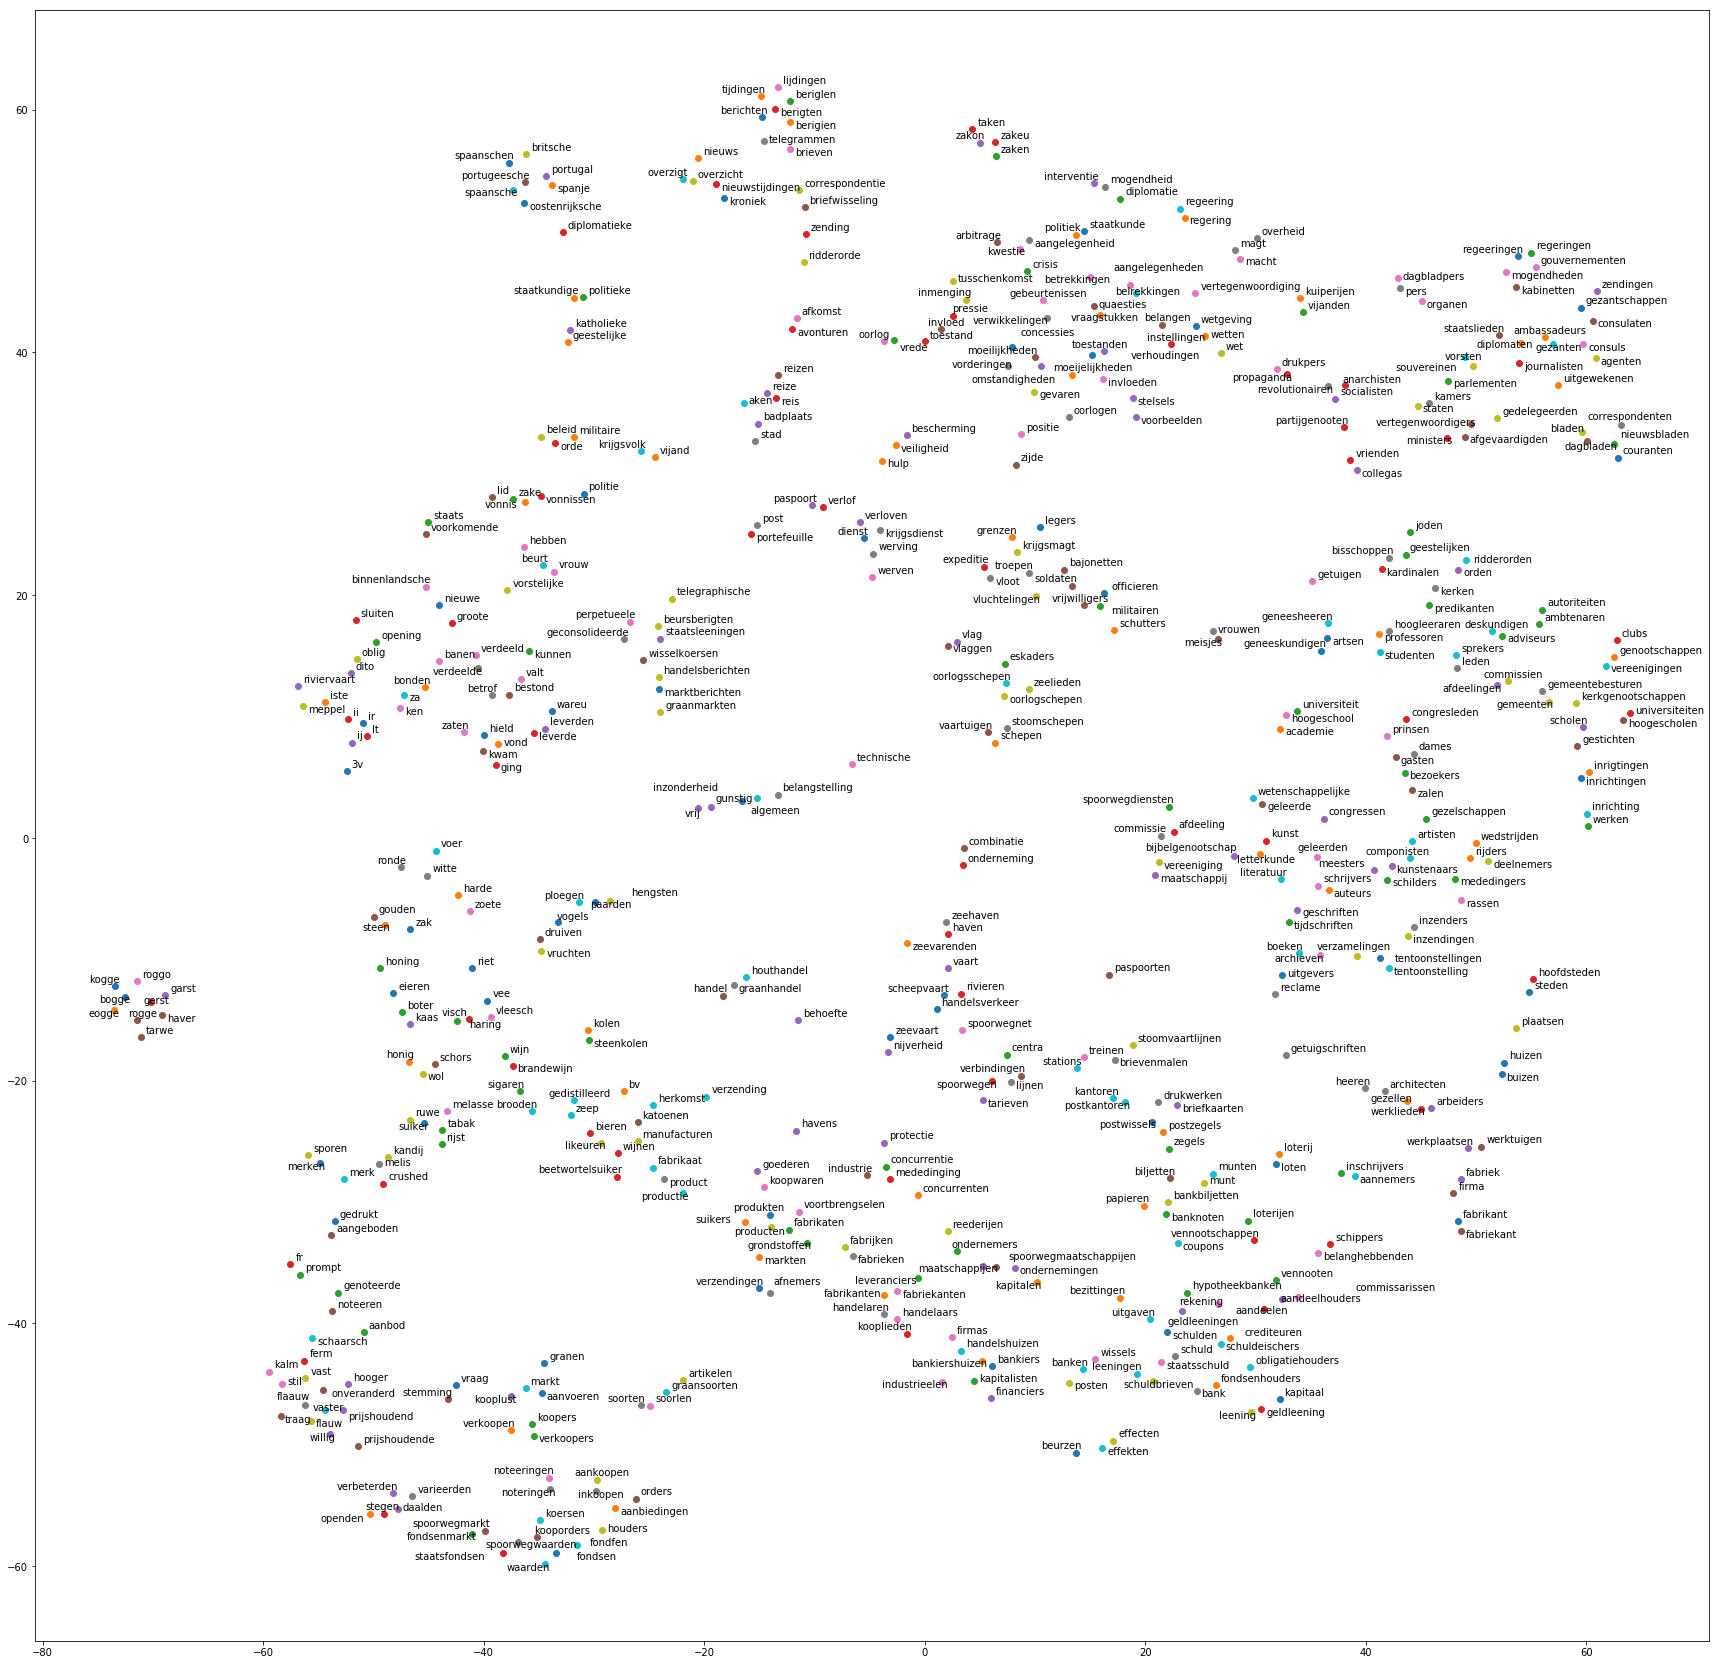

In [109]:
x = []
y = []

for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(30, 30)) 
scatter = [plt.scatter(x[i], y[i]) for i in range(len(x))]
texts = [plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2),textcoords='offset points', ha='right',va='bottom') for i in range(len(x))]
adjust_text(texts)
plt.show()